# 1.简介
该部分的学习内容是对经典的阈值分割算法进行回顾，图像阈值化分割是一种传统的最常用的图像分割方法，因其实现简单、计算量小、性能较稳定而成为图像分割中最基本和应用最广泛的分割技术。它特别适用于目标和背景占据不同灰度级范围的图像。它不仅可以极大的压缩数据量，而且也大大简化了分析和处理步骤，因此在很多情况下，是进行图像分析、特征提取与模式识别之前的必要的图像预处理过程。图像阈值化的目的是要按照灰度级，对像素集合进行一个划分，得到的每个子集形成一个与现实景物相对应的区域，各个区域内部具有一致的属性，而相邻区域不具有这种一致属性。这样的划分可以通过从灰度级出发选取一个或多个阈值来实现。

# 2.学习目标
- 了解阈值分割基本概念

- 理解最大类间方差法（大津法）、自适应阈值分割的原理

- 掌握OpenCV框架下上述阈值分割算法API的使用

# 3.内容介绍
- 最大类间方差法、自适应阈值分割的原理
- OpenCV代码实践

# 4.算法理论介绍
## 4.1最大类间方差法（大津阈值法）
大津法（OTSU）是一种确定图像二值化分割阈值的算法，由日本学者大津于1979年提出。从大津法的原理上来讲，该方法又称作最大类间方差法，因为按照大津法求得的阈值进行图像二值化分割后，前景与背景图像的类间方差最大。

它被认为是图像分割中阈值选取的最佳算法，计算简单，不受图像亮度和对比度的影响，因此在数字图像处理上得到了广泛的应用。它是按图像的灰度特性，将图像分成背景和前景两部分。因方差是灰度分布均匀性的一种度量,背景和前景之间的类间方差越大,说明构成图像的两部分的差别越大,当部分前景错分为背景或部分背景错分为前景都会导致两部分差别变小。因此,使类间方差最大的分割意味着错分概率最小。

应用： 是求图像全局阈值的最佳方法，应用不言而喻，适用于大部分需要求图像全局阈值的场合。

优点： 计算简单快速，不受图像亮度和对比度的影响。

缺点： 对图像噪声敏感；只能针对单一目标分割；当目标和背景大小比例悬殊、类间方差函数可能呈现双峰或者多峰，这个时候效果不好。

原理非常简单，涉及的知识点就是均值、方差等概念和一些公式推导。为了便于理解，我们从目的入手，反推一下这著名的OTSU算法。

求类间方差：

OTSU算法的假设是存在阈值TH将图像所有像素分为两类C1(小于TH)和C2(大于TH)，则这两类像素各自的均值就为m1、m2，图像全局均值为mG。同时像素被分为C1和C2类的概率分别为p1、p2。因此就有：
![avatar](1.png)
根据原文，式（4）还可以进一步变形：
![avatar](2.png)
分割：
这个分割就是二值化，OpenCV给了以下几种方式，很简单，可以参考：
![avatar](3.png)

## 4.2自适应阈值
前面介绍了OTSU算法，但这算法属于全局阈值法，所以对于某些光照不均的图像，这种全局阈值分割的方法会显得苍白无力，如下图：
![avatar](5.png)
显然，这样的阈值处理结果不是我们想要的，那么就需要一种方法来应对这样的情况。

这种办法就是自适应阈值法(adaptiveThreshold)，它的思想不是计算全局图像的阈值，而是根据图像不同区域亮度分布，计算其局部阈值，所以对于图像不同区域，能够自适应计算不同的阈值，因此被称为自适应阈值法。(其实就是局部阈值法)

如何确定局部阈值呢？可以计算某个邻域(局部)的均值、中值、高斯加权平均(高斯滤波)来确定阈值。值得说明的是：如果用局部的均值作为局部的阈值，就是常说的移动平均法。

# 5.基于OpenCV的实现


### Otsu的二值化

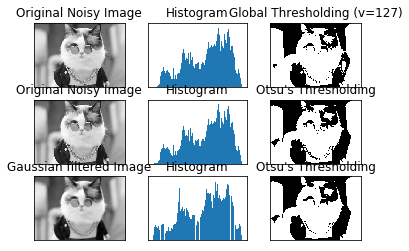

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('test1.jpeg',0)
# 全局阈值
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu阈值
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# 高斯滤波后再采用Otsu阈值
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# 绘制所有图像及其直方图
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

### 简单阈值

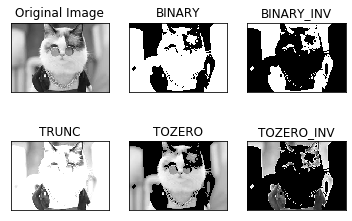

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('test1.jpeg',0)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# 参考博客
- http://www.woshicver.com/FifthSection/4_3_%E5%9B%BE%E5%83%8F%E9%98%88%E5%80%BC/
- https://github.com/iquanzhan/sql-written